In [24]:
#!pip install netCDF4
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from datetime import datetime
import xarray as xr
from matplotlib.ticker import ScalarFormatter
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
#os.chdir(r"C:/Users/your_path") # sets your working directory

In [25]:
# open the seaglider dataset and set up the coordinates
sg_df = xr.open_dataset('file_path') 
sg_df = sg_df.set_coords("latitude")
sg_df = sg_df.set_coords("longitude")
sg_df = sg_df.set_coords("depth")

# Extract variables (can swap with the variables that you wish to plot)
lat = np.array(sg_df['latitude'])
lon = np.array(sg_df['longitude'])
temp = np.array(sg_df['temperature'])
salinity = np.array(sg_df['salinity'])
oxygen = np.array(sg_df['dissolved_oxygen_sat'])
depth = np.array(sg_df['depth'])

time = np.array(sg_df['time'])
sg_months = pd.to_datetime(time).month # allows me to distinguish the month that the data is from 


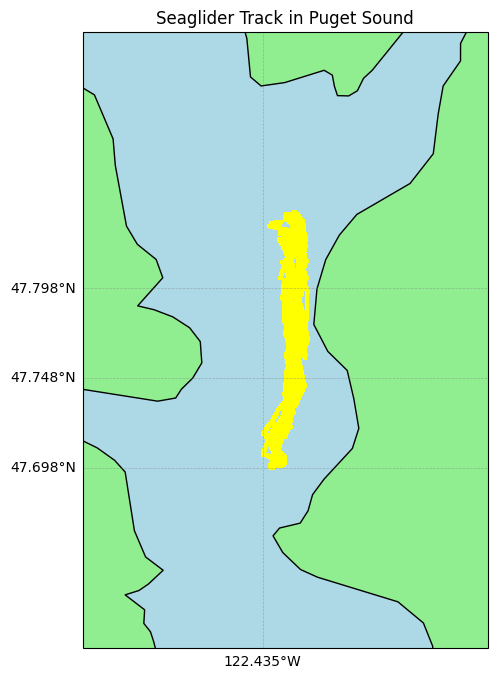

In [34]:
plt.figure(figsize=(10, 8))

# Set up a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid()

# Zoom in to your data bounds with a variable buffer
buffer = 0.10  # degrees
ax.set_extent([lon.min()-buffer, lon.max()+buffer,
               lat.min()-buffer, lat.max()+buffer],
              crs=ccrs.PlateCarree())

# Add gridlines
grid = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
grid.top_labels = False
grid.right_labels = False
grid.xlocator = plt.FixedLocator(np.arange(lon.min(), lon.max(), 0.05))
grid.ylocator = plt.FixedLocator(np.arange(lat.min(), lat.max(), 0.05))


# Add land and ocean
ax.add_feature(cfeature.LAND, facecolor='lightgreen')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)

# Plot your glider track
ax.scatter(lon, lat, c="yellow", s=10, marker = '_', transform=ccrs.PlateCarree())

ax.set_title("Seaglider Track...")
plt.show()


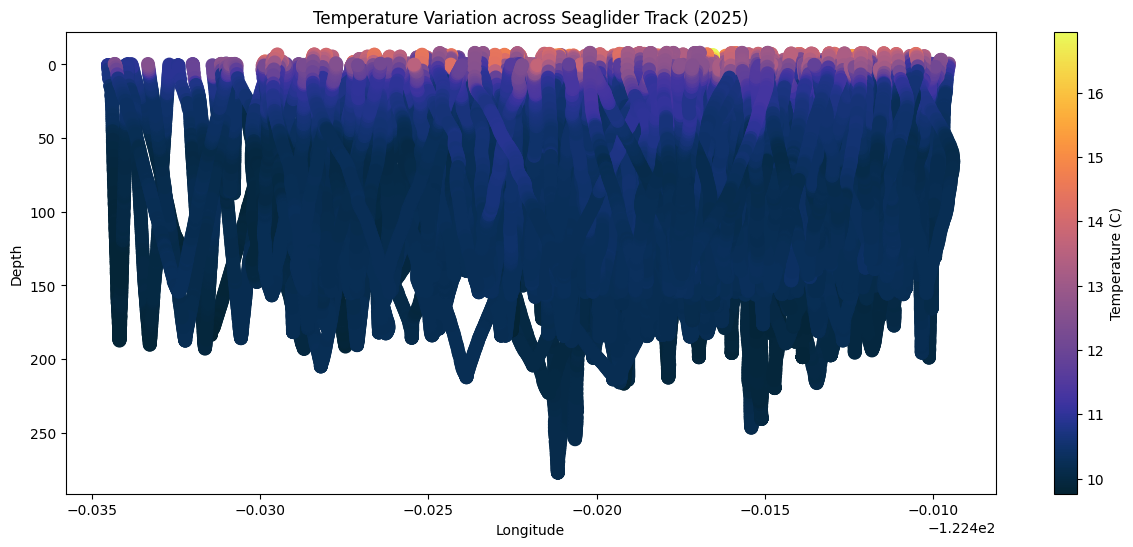

In [35]:
plt.figure(figsize=(15, 6))
scatter = plt.scatter(time, depth, c=temp, cmap= cm.cm.thermal, s=80)
plt.colorbar(label="Temperature (C)")
plt.xlabel("Time")
plt.ylabel("Depth")
plt.gca().invert_yaxis()


plt.title("Temperature...")

plt.show()

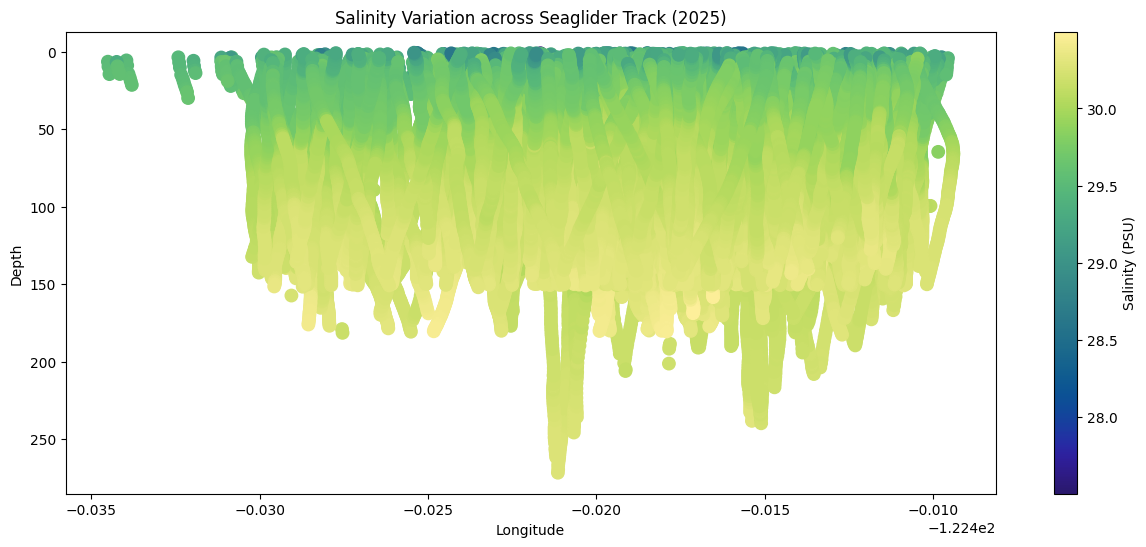

In [36]:
plt.figure(figsize=(15, 6))
scatter = plt.scatter(time, depth, c=salinity, cmap= cm.cm.haline, s=80)
plt.colorbar(label="Salinity (PSU)")
plt.xlabel("Time")
plt.ylabel("Depth")
plt.gca().invert_yaxis()


plt.title("Salinity...")

plt.show()

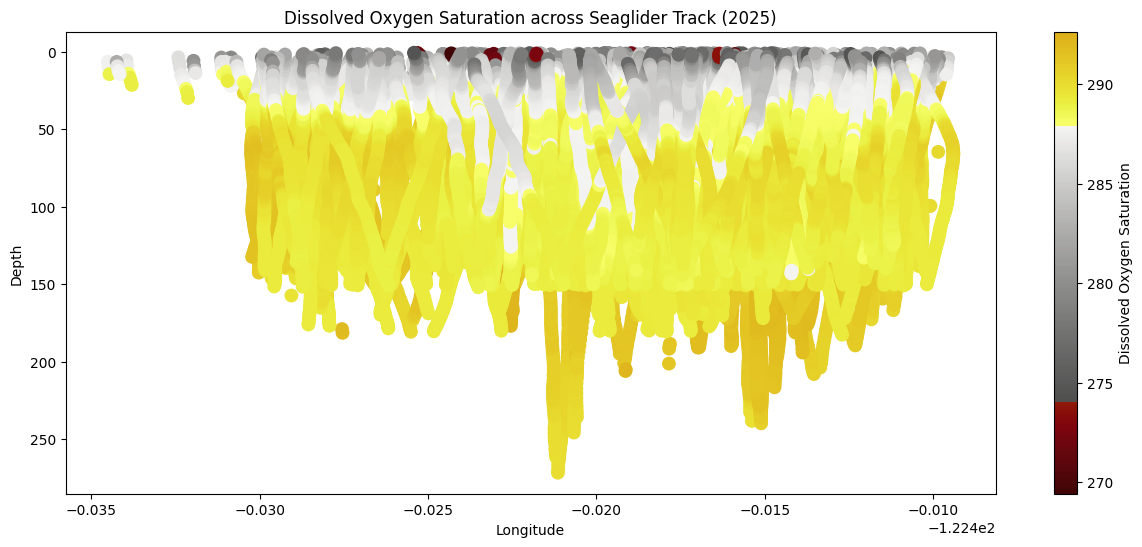

In [37]:
plt.figure(figsize=(15, 6))
scatter = plt.scatter(time, depth, c=oxygen, cmap= cm.cm.oxy, s=80)
plt.colorbar(label="Dissolved Oxygen Saturation")
plt.xlabel("Time")
plt.ylabel("Depth")
plt.gca().invert_yaxis()


plt.title("Dissolved Oxygen Saturation...")

plt.show()